# Exploratory Data Analysis


## Importing the libraries

In [1]:
import pandas as pd

## Importing the dataset

[UCI - Auto MPG Dataset](https://archive.ics.uci.edu/ml/datasets/auto+mpg)

This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.


In [2]:
auto_mpg_df = pd.read_table('./data/auto-mpg/auto-mpg.data', sep="\t", header=None, names=("mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin","car_name"))

In [4]:
## Get 10 Random Rows from the dataframe


In [5]:
## Get the dataset info from the dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           400 non-null    float64
 1   cylinders     409 non-null    float64
 2   displacement  409 non-null    float64
 3   horsepower    403 non-null    float64
 4   weight        409 non-null    float64
 5   acceleration  409 non-null    float64
 6   model_year    409 non-null    float64
 7   origin        409 non-null    float64
 8   car_name      409 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.9+ KB


In [ ]:
# get some statistical information about the dataset


## Data Types

<details>
<summary><strong>Expand for a visual summary of the Data Types</strong></summary>
  
  ![Data types](https://miro.medium.com/max/1400/1*kySPZcf83qLOuaqB1vJxlg.jpeg)
</details>

In [ ]:
## Cylinders


In [ ]:
## Model Year


#### Side: Lambda Functions
Functions that have one one expression.

In [ ]:
add_1900 = lambda x: x + 1900
auto_mpg_df['model_year'].apply(lambda x: x + 1900)

In [ ]:
## Origin
auto_mpg_df['origin_name'] = auto_mpg_df['origin'].astype(str).map({'1': 'US', '2': 'European', '3': 'Asian'})

## Data Cleaning
### Duplicate values

In [13]:
auto_mpg_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
404    False
405    False
406    False
407    False
408    False
Length: 409, dtype: bool

In [14]:
auto_mpg_df.duplicated().sum()

2

In [15]:
auto_mpg_df[auto_mpg_df.duplicated()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,origin_name
255,NaN,8.0,383.0,175.0,4166.0,10.5,1970,1,plymouth satellite (sw),US
393,16.0,8.0,400.0,180.0,4220.0,11.1,1977,1,pontiac grand prix lj,US


In [16]:
auto_mpg_without_duplicate1 = auto_mpg_df[~auto_mpg_df.duplicated()]
auto_mpg_without_duplicate1.duplicated().sum()

0

In [17]:
auto_mpg_without_duplicate2 = auto_mpg_df.drop_duplicates()
auto_mpg_without_duplicate2.duplicated().sum()

0

In [18]:
# auto_mpg_df = auto_mpg_df.drop_duplicates()
auto_mpg_df.drop_duplicates(inplace=True)

In [19]:
auto_mpg_df.duplicated().sum()

0

In [20]:
auto_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407 entries, 0 to 408
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           399 non-null    float64 
 1   cylinders     407 non-null    float64 
 2   displacement  407 non-null    float64 
 3   horsepower    401 non-null    float64 
 4   weight        407 non-null    float64 
 5   acceleration  407 non-null    float64 
 6   model_year    407 non-null    int64   
 7   origin        407 non-null    category
 8   car_name      407 non-null    object  
 9   origin_name   407 non-null    object  
dtypes: category(1), float64(6), int64(1), object(2)
memory usage: 32.3+ KB


### Missing Data

In [21]:
auto_mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,399.000000,407.000000,407.000000,401.000000,407.000000,407.000000,407.000000
mean,23.500752,5.476658,194.797297,105.069825,2980.157248,15.519656,1975.909091
std,7.811039,1.710247,106.180724,38.721120,846.093527,2.799904,3.752056
min,9.000000,3.000000,4.000000,46.000000,1613.000000,8.000000,1970.000000
25%,17.500000,4.000000,104.500000,76.000000,2227.000000,13.700000,1973.000000
50%,23.000000,4.000000,151.000000,95.000000,2830.000000,15.500000,1976.000000
75%,29.000000,8.000000,302.000000,130.000000,3616.500000,17.150000,1979.000000
max,46.600000,8.000000,502.000000,230.000000,5140.000000,24.800000,1982.000000


In [22]:
auto_mpg_df['displacement'].mean()

194.7972972972973

In [23]:
auto_mpg_df['displacement'].median()

151.0

In [10]:
from scipy.stats import trim_mean

trim_mean(auto_mpg_df['displacement'], 0.1)

In [25]:
auto_mpg_df.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
origin_name     0
dtype: int64

In [26]:
auto_mpg_df[auto_mpg_df['mpg'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,origin_name
10,NaN,4.0,133.0,115.0,3090.0,17.5,1970,2,citroen ds-21 pallas,European
11,NaN,8.0,350.0,165.0,4142.0,11.5,1970,1,chevrolet chevelle concours (sw),US
12,NaN,8.0,351.0,153.0,4034.0,11.0,1970,1,ford torino (sw),US
13,NaN,8.0,383.0,175.0,4166.0,10.5,1970,1,plymouth satellite (sw),US
14,NaN,8.0,360.0,175.0,3850.0,11.0,1970,1,amc rebel sst (sw),US
17,NaN,8.0,302.0,140.0,3353.0,8.0,1970,1,ford mustang boss 302,US
39,NaN,4.0,97.0,48.0,1978.0,20.0,1971,2,volkswagen super beetle 117,European
369,NaN,4.0,121.0,110.0,2800.0,15.4,1981,2,saab 900s,European


In [27]:
auto_mpg_df.dropna(subset=["mpg"], inplace=True)

In [28]:
auto_mpg_df[auto_mpg_df['mpg'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,origin_name


In [29]:
# Central Tendency measures
auto_displacement_mean = auto_mpg_df['displacement'].mean()
auto_displacement_trimmed_mean = trim_mean(auto_mpg_df['displacement'], 0.1)
auto_displacement_median = auto_mpg_df['displacement'].median()

print("mean is {}, trimmed mean is {}, median is {}".format(auto_displacement_mean, auto_displacement_trimmed_mean, auto_displacement_median))

mean is 193.44736842105263, trimmed mean is 182.67445482866043, median is 146.0


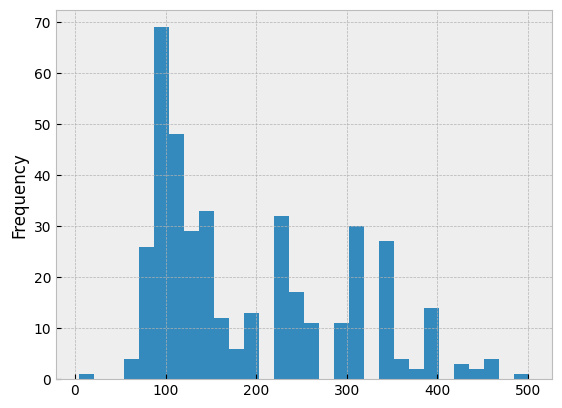

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("bmh")

auto_mpg_df['displacement'].plot(kind="hist", bins= 30)

plt.show()

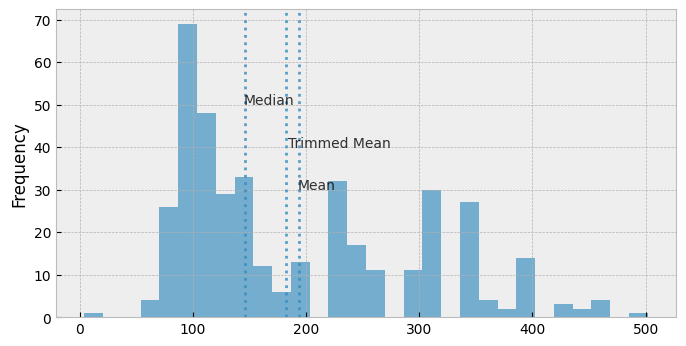

In [31]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use("bmh")


fig, ax = plt.subplots(figsize = (8,4))

auto_mpg_df['displacement'].plot(kind="hist", bins=30, alpha = 0.65)

ax.axvline(auto_displacement_median, alpha = 0.8, linestyle = ":")
ax.text(auto_displacement_median-1, 50, "Median", size = 10, alpha = 0.8)

ax.axvline(auto_displacement_trimmed_mean, alpha = 0.8, linestyle = ":")
ax.text(auto_displacement_trimmed_mean+1, 40, "Trimmed Mean", size = 10, alpha = 0.8)

ax.axvline(auto_displacement_mean, alpha = 0.8, linestyle = ":")
ax.text(auto_displacement_mean-1, 30, "Mean", size = 10, alpha = 0.8)

plt.show()

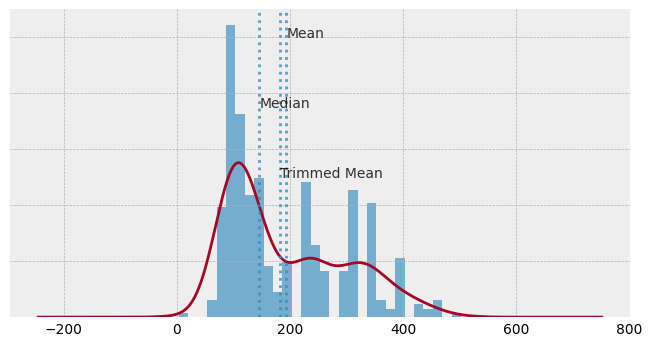

In [32]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# plt.style.use("bmh")


fig, ax = plt.subplots(figsize = (8,4))

auto_mpg_df['displacement'].plot(kind="hist", density= True, bins=30, alpha = 0.65)
auto_mpg_df['displacement'].plot(kind="kde")

ax.axvline(auto_displacement_mean, alpha = 0.8, linestyle = ":")
ax.axvline(auto_displacement_median, alpha = 0.8, linestyle = ":")
ax.axvline(auto_displacement_trimmed_mean, alpha = 0.8, linestyle = ":")

ax.set_ylim(0, .011)
ax.set_yticklabels([])
ax.set_ylabel("")

ax.text(auto_displacement_mean-.1, .01, "Mean", size = 10, alpha = 0.8)
ax.text(auto_displacement_median-.4, .0075, "Median", size = 10, alpha = 0.8)
ax.text(auto_displacement_trimmed_mean+.4, .0050, "Trimmed Mean", size = 10, alpha = 0.8)

ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

plt.show()

In [33]:
auto_mpg_df['displacement'].fillna(auto_displacement_median, inplace=True)

In [34]:
auto_mpg_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
origin_name     0
dtype: int64

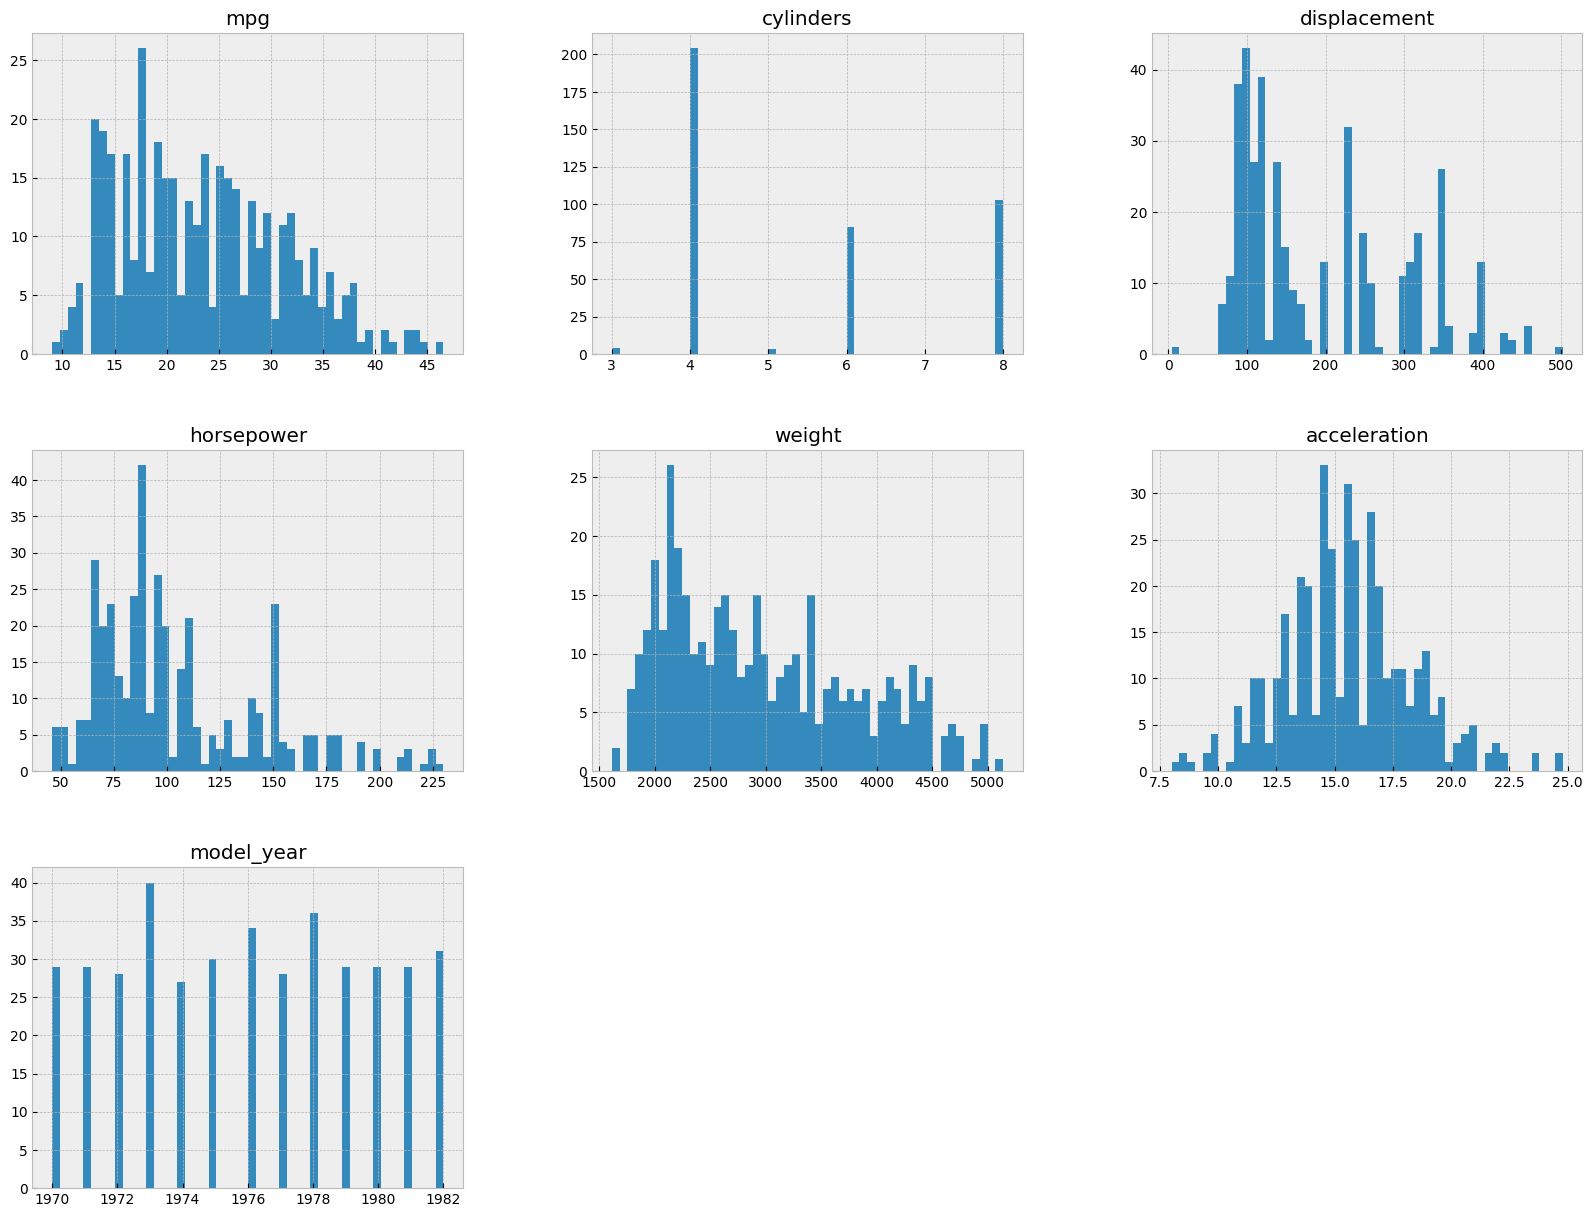

In [35]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


auto_mpg_df.hist(bins=50, figsize=(20,15))
plt.show()

### Anomalies and outliers

<AxesSubplot: >

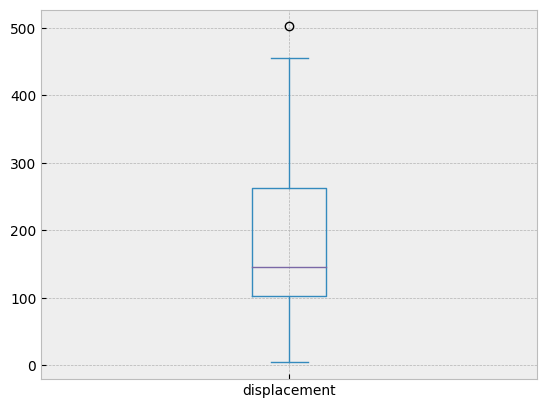

In [36]:
auto_mpg_df['displacement'].plot(kind="box")

In [37]:
auto_mpg_df['displacement'].describe()

count    399.000000
mean     193.447368
std      105.563056
min        4.000000
25%      102.500000
50%      146.000000
75%      262.000000
max      502.000000
Name: displacement, dtype: float64

In [38]:
q1,q3 = auto_mpg_df['displacement'].quantile([0.25, 0.75])
print("Q1 is {} and Q3 is {}".format(q1, q3))

Q1 is 102.5 and Q3 is 262.0


In [39]:
Q1 = auto_mpg_df['displacement'].quantile(0.25)
Q3 = auto_mpg_df['displacement'].quantile(0.75)
print("Q1 is {} and Q3 is {}".format(Q1, Q3))
IQR = Q3 - Q1
print("IQR is {}".format(IQR))
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("The lower bound is {}, and the upper bound is {}".format(lower_bound, upper_bound))

Q1 is 102.5 and Q3 is 262.0
IQR is 159.5
The lower bound is -136.75, and the upper bound is 501.25


In [40]:
auto_mpg_df[
  (auto_mpg_df['displacement'] < lower_bound) | (auto_mpg_df['displacement'] > upper_bound)
]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,origin_name
43,18.0,6.0,502.0,100.0,3282.0,15.5,1971,1,outlier car,US


In [41]:
auto_mpg_df.drop(
  auto_mpg_df[
  (auto_mpg_df['displacement'] < lower_bound) | (auto_mpg_df['displacement'] > upper_bound)
].index, inplace = True
)

In [42]:
auto_mpg_df[
  (auto_mpg_df['displacement'] < lower_bound) | (auto_mpg_df['displacement'] > upper_bound)
]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,origin_name


<AxesSubplot: >

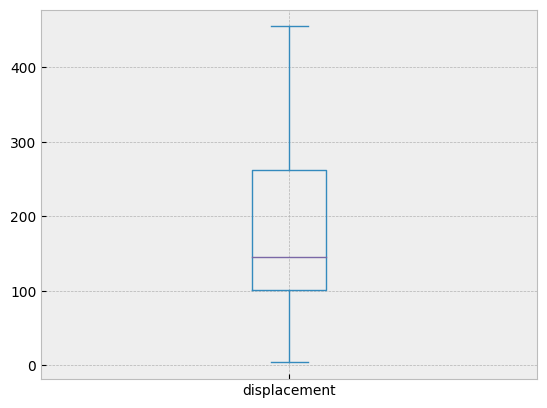

In [43]:
auto_mpg_df['displacement'].plot(kind="box")

## Data Correlation

mpg            -0.778427
acceleration   -0.689196
model_year     -0.416361
cylinders       0.842983
weight          0.864538
displacement    0.877934
horsepower      1.000000
Name: horsepower, dtype: float64

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>,
        <Axes: xlabel='displacement', ylabel='weight'>,
        <Axes: xlabel='horsepower', ylabel='weight'>,
        <Axes: xlabel='cylinders', ylabel='weight'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='weight', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement'>,
        <Axes: xlabel='horsepower', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>],
       [<Axes: xlabel='mpg', ylabel='horsepower'>,
        <Axes: xlabel='weight', ylabel='horsepower'>,
        <Axes: xlabel='displacement', ylabel='horsepower'>,
        <Axes: xlabel='horsepower', y

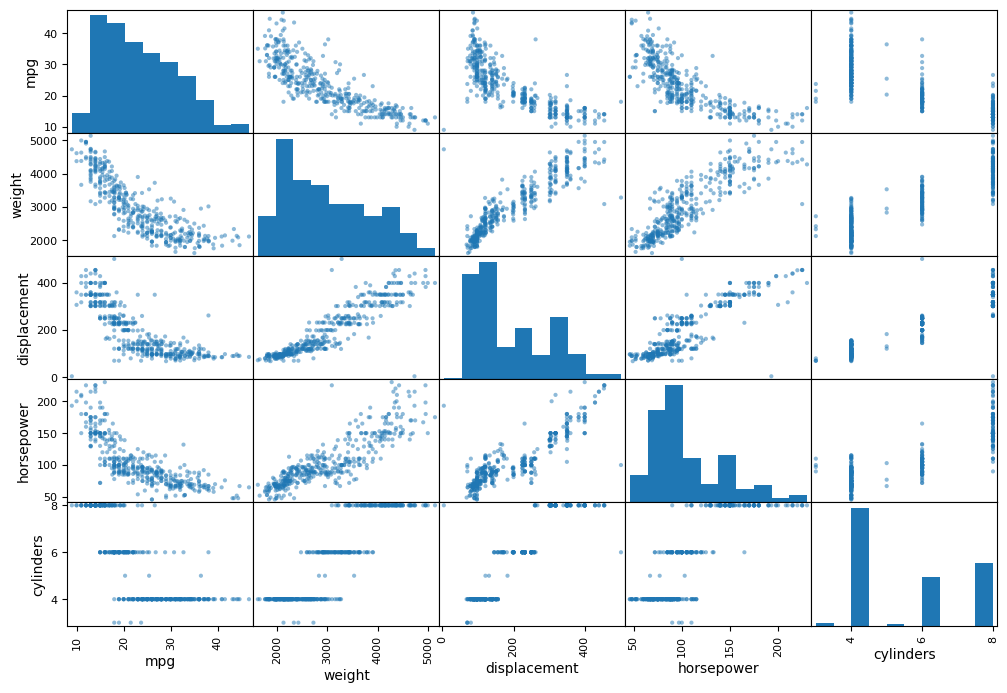

In [9]:
from pandas.plotting import scatter_matrix

attributes = ["mpg", "weight", "displacement",
              "horsepower", "cylinders"]
display(scatter_matrix(auto_mpg_df[attributes], figsize=(12,8)))